In [1]:
#  simpleRegressor.py
#  G. Cowan / RHUL Physics / November 2021
#  Simple program to illustrate regression with scikit-learn

import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#  read the data in from file
events = np.loadtxt('trainingData.txt')
nEvt = events.shape[0]
X = events[:,1:]          # columns 1,2,3,4 are eta, s1, s2, s3
y = events[:,0]           # target value E is column 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [3]:
# create regressor object, train and test
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
R2 = regr.score(X_test, y_test)
print(f"Test R2 score: {R2:.3f}")

Test R2 score: 0.898


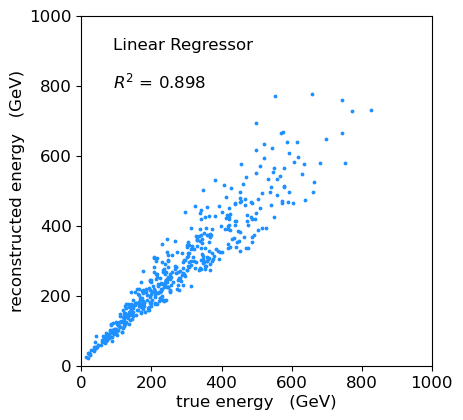

In [4]:
# make a plot
matplotlib.rcParams.update({'font.size':12})     # set all font sizes
fig, ax = plt.subplots(1,1)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
ax.set_xlim((0.,1000.))
ax.set_ylim((0.,1000.))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))    # make square plot
xtick_spacing = 200
ytick_spacing = 200
ax.yaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing))
plt.xlabel('true energy   (GeV)', labelpad=3)
plt.ylabel('reconstructed energy   (GeV)', labelpad=3)
plt.scatter(y_test, y_pred, s=3, color='dodgerblue', marker='o')
plt.figtext(0.3, 0.81, f'Linear Regressor')
plt.figtext(0.3, 0.73, f'$R^2$ = {R2:.3f}')
plt.show()
plt.savefig("LinearRegressor.pdf", format='pdf')